In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
headlines = [
    "AI outperforms doctors in diagnosing rare diseases",
    "Stock markets hit new record highs amid global optimism",
    "New vaccine shows promise in early trials",
    "Climate change impacts agriculture across multiple continents",
    "Scientists develop biodegradable plastic from seaweed",
    "Sports teams adapt strategies with big data analytics",
    "Electric vehicles set new sales record worldwide",
    "Breakthrough in quantum computing boosts encryption security"
]

In [4]:
def preprocess_text(text_list):
    cleaned = []
    for text in text_list:
        text = text.lower()                              # lowercase
        text = re.sub(r'[^\w\s]', '', text)              # remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()         # normalize whitespace
        cleaned.append(text)
    return cleaned

cleaned_headlines = preprocess_text(headlines)
print("Preprocessed Headlines:\n", cleaned_headlines)


Preprocessed Headlines:
 ['ai outperforms doctors in diagnosing rare diseases', 'stock markets hit new record highs amid global optimism', 'new vaccine shows promise in early trials', 'climate change impacts agriculture across multiple continents', 'scientists develop biodegradable plastic from seaweed', 'sports teams adapt strategies with big data analytics', 'electric vehicles set new sales record worldwide', 'breakthrough in quantum computing boosts encryption security']


In [7]:
vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(cleaned_headlines)

print("\nVocabulary:\n", vectorizer.vocabulary_)
print("\nBoW Matrix Shape:", X.shape)
print("Sparsity: {:.2f}%".format(100.0 * (1.0 - X.count_nonzero() / (X.shape[0] * X.shape[1]))))


Vocabulary:
 {'ai': np.int64(2), 'outperforms': np.int64(29), 'doctors': np.int64(17), 'diagnosing': np.int64(15), 'rare': np.int64(33), 'diseases': np.int64(16), 'stock': np.int64(42), 'markets': np.int64(25), 'hit': np.int64(23), 'new': np.int64(27), 'record': np.int64(34), 'highs': np.int64(22), 'amid': np.int64(3), 'global': np.int64(21), 'optimism': np.int64(28), 'vaccine': np.int64(46), 'shows': np.int64(40), 'promise': np.int64(31), 'early': np.int64(18), 'trials': np.int64(45), 'climate': np.int64(10), 'change': np.int64(9), 'impacts': np.int64(24), 'agriculture': np.int64(1), 'multiple': np.int64(26), 'continents': np.int64(12), 'scientists': np.int64(36), 'develop': np.int64(14), 'biodegradable': np.int64(6), 'plastic': np.int64(30), 'seaweed': np.int64(37), 'sports': np.int64(41), 'teams': np.int64(44), 'adapt': np.int64(0), 'strategies': np.int64(43), 'big': np.int64(5), 'data': np.int64(13), 'analytics': np.int64(4), 'electric': np.int64(19), 'vehicles': np.int64(47), 'se

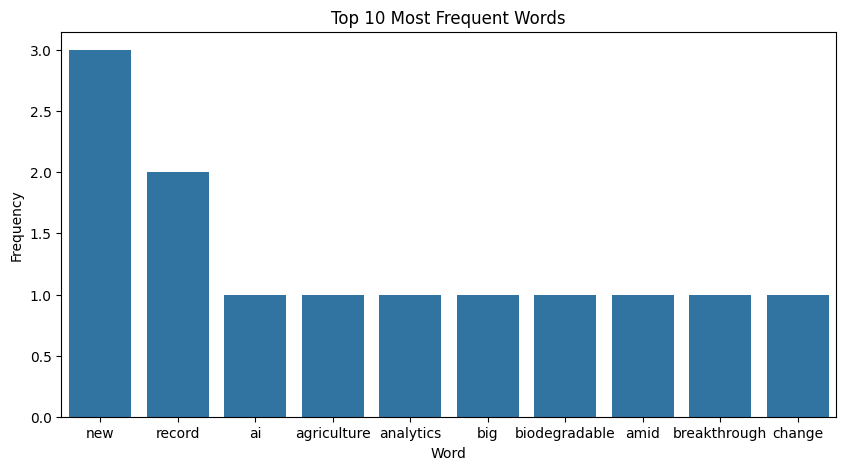

In [8]:
word_freq = np.array(X.sum(axis=0)).flatten()
vocab = vectorizer.get_feature_names_out()
freq_df = pd.DataFrame({'word': vocab, 'frequency': word_freq})
freq_df = freq_df.sort_values(by='frequency', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=freq_df.head(10), x='word', y='frequency')
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

In [11]:
similarity_matrix = cosine_similarity(X)

similarity_df = pd.DataFrame(similarity_matrix, columns=[f'H{i+1}' for i in range(len(headlines))], index=[f'H{i+1}' for i in range(len(headlines))])
print("\nCosine Similarity Matrix:")
display(similarity_df.round(2))


Cosine Similarity Matrix:


,H1,H2,H3,H4,H5,H6,H7,H8
H1,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0
H2,0.0,1.00,0.14,0.0,0.0,0.0,0.25,0.0
H3,0.0,0.14,1.00,0.0,0.0,0.0,0.15,0.0
H4,0.0,0.00,0.00,1.0,0.0,0.0,0.00,0.0
H5,0.0,0.00,0.00,0.0,1.0,0.0,0.00,0.0
H6,0.0,0.00,0.00,0.0,0.0,1.0,0.00,0.0
H7,0.0,0.25,0.15,0.0,0.0,0.0,1.00,0.0
H8,0.0,0.00,0.00,0.0,0.0,0.0,0.00,1.0


In [14]:
max_sim_index = np.unravel_index(np.argmax(similarity_matrix), similarity_matrix.shape)
i, j = max_sim_index

print(f"\nMost similar headlines:\nHeadline {i+1}: {headlines[i]}\nHeadline {j+1}: {headlines[j]}")
print(f"Cosine Similarity: {similarity_matrix[i, j]:.2f}")

shared_words = set(cleaned_headlines[i].split()).intersection(set(cleaned_headlines[j].split()))
print("\nShared Words:", shared_words)


Most similar headlines:
Headline 2: Stock markets hit new record highs amid global optimism
Headline 7: Electric vehicles set new sales record worldwide
Cosine Similarity: 0.25

Shared Words: {'record', 'new'}
